In [ ]:
# 1. Importando as bibliotecas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 2. Carregando o conjunto de dados
iris = load_iris()
X = iris.data  # As características (comprimento e largura das pétalas e sépalas)
y = iris.target  # A variável alvo (espécie da flor)
# 3. Dividindo em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Criando e treinando o modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# 5. Fazendo previsões
y_pred = modelo.predict(X_test)

# 6. Avaliando o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 1.0

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



📄 Relatório de Classificação:
Acurácia: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



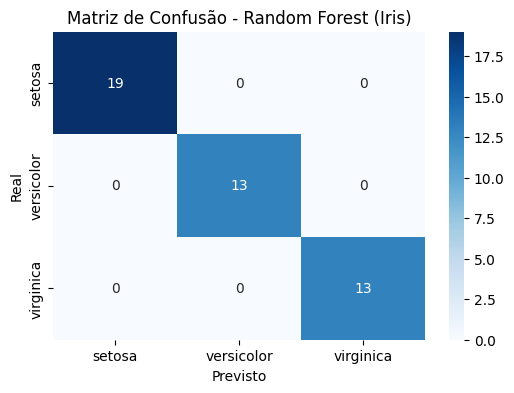

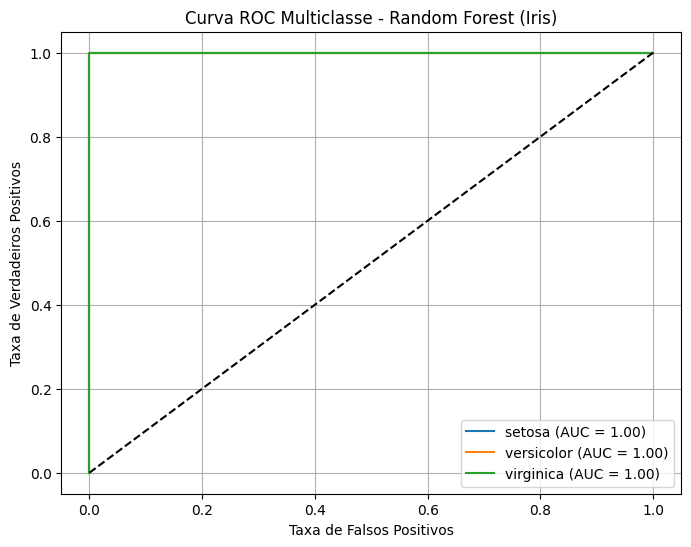

In [ ]:
# 1. Importando as bibliotecas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2. Carregando o conjunto de dados
iris = load_iris()
X = iris.data
y = iris.target
classes = iris.target_names

# 3. Dividindo em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Criando e treinando o modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# 5. Fazendo previsões
y_pred = modelo.predict(X_test)

# 6. Avaliação - Acurácia e Relatório
print("📄 Relatório de Classificação:")
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=classes))

# 7. Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusão - Random Forest (Iris)')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# 8. Curva ROC AUC - Multiclasse
# Binarizando as classes
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = modelo.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(8, 6))

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'{classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curva ROC Multiclasse - Random Forest (Iris)')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
# 1. Importando as bibliotecas
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Carregando o conjunto de dados (substituto para Boston Housing)
casa = fetch_california_housing()
X = casa.data  # As características (ex: tamanho, localização)
y = casa.target  # O preço das casas

# 3. Dividindo em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Criando e treinando o modelo
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# 5. Fazendo previsões
y_pred = modelo.predict(X_test)

# 6. Avaliando o modelo
print("Erro Quadrático Médio:", mean_squared_error(y_test, y_pred))
print("R² (Coeficiente de Determinação):", r2_score(y_test, y_pred))


Erro Quadrático Médio: 0.25650512920799395
R² (Coeficiente de Determinação): 0.8045734925119942
